# Adaptación de datos satelitales a datos in sitio

In [1]:
# Librerías
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime

import os

In [2]:
# Se cargan los datos
datosSD = pd.read_excel('Datos Tesis/Tesis/DatosKioskoNSRDB/datosRadiacionSD.xlsx')
datosfechaSD = datosSD.set_index('DateTime')
datosSolar = pd.read_csv('Datos Tesis/Tesis/DatosKioskoNSRDB/DatosSOLARCAST4.710989_-74.072092_Solcast_PT60M.csv')

In [3]:
a =[None]*2
fechitas=['2006-12-31T20:00:00Z','2006-12-31T21:00:00Z','2006-12-31T22:00:00Z','2006-12-31T23:00:00Z','2007-01-01T00:00:00Z']
a.append(pd.Series(fechitas))
b = datosSolar.PeriodStart[0:len(datosSolar)-5]
a.append(b)
c=pd.concat(a)
dataFechaSolarCastArreglado = datosSolar.set_index(c)

In [4]:
# Datos SD viejos
datosSDSinCompletar = datosfechaSD.loc['2019-05-07 17:00:00':'2019-05-12  1:00:00']
datosSDSinCompletar = datosSDSinCompletar.append(datosfechaSD.loc['2019-05-12 9:00:00':'2019-05-16  3:00:00'])
datosSDSinCompletar = datosSDSinCompletar.append(datosfechaSD.loc['2019-05-16 11:00:00':'2019-05-29  6:00:00'])
datosSDSinCompletar = datosSDSinCompletar.append(datosfechaSD.loc['2019-05-29 14:00:00':'2019-07-8  9:00:00'])

In [5]:
#
datosSolarSinCompletar = dataFechaSolarCastArreglado.loc['2019-05-07T17:00:00Z':'2019-05-12T01:00:00Z']
datosSolarSinCompletar = datosSolarSinCompletar.append(dataFechaSolarCastArreglado.loc['2019-05-12T09:00:00Z':'2019-05-16T03:00:00Z'])
datosSolarSinCompletar = datosSolarSinCompletar.append(dataFechaSolarCastArreglado.loc['2019-05-16T11:00:00Z':'2019-05-29T06:00:00Z'])
datosSolarSinCompletar = datosSolarSinCompletar.append(dataFechaSolarCastArreglado.loc['2019-05-29T14:00:00Z':'2019-07-08T09:00:00Z'])
#
datosSolarSinCompletar = datosSolarSinCompletar.set_index(datosSDSinCompletar.index)

In [6]:
datosSDSinCompletar

,Temp,TempAlta,TempBaja,RadSolar,EnergíaSolar,RadSolarAlta
DateTime,,,,,,
2019-05-07 17:00:00,19.4,23.0,19.4,59,5.08,162
2019-05-07 18:00:00,17.4,19.5,17.4,47,4.04,97
2019-05-07 19:00:00,16.4,17.4,16.3,0,0.00,0
2019-05-07 20:00:00,16.3,16.6,16.1,0,0.00,0
2019-05-07 21:00:00,16.2,16.7,15.7,0,0.00,0
...,...,...,...,...,...,...
2019-07-08 05:00:00,11.4,11.8,11.4,0,0.00,0
2019-07-08 06:00:00,11.4,11.7,11.3,0,0.00,7
2019-07-08 07:00:00,11.4,11.4,10.7,43,3.70,86


In [7]:
datosSolarSinCompletar

,PeriodEnd,PeriodStart,Period,AirTemp,AlbedoDaily,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith
DateTime,,,,,,,,,,,,,,,,,,,,
2019-05-07 17:00:00,2019-05-07T23:00:00Z,2019-05-07T22:00:00Z,PT60M,19.5,0.12,74,26.5,17.1,55,64,9,64,62,78,28.7,86.1,813.9,139,2.1,83
2019-05-07 18:00:00,2019-05-08T00:00:00Z,2019-05-07T23:00:00Z,PT60M,19.4,0.12,72,29.1,17.8,0,0,0,0,0,0,28.5,90.5,814.3,140,2.1,98
2019-05-07 19:00:00,2019-05-08T01:00:00Z,2019-05-08T00:00:00Z,PT60M,18.6,0.12,70,28.0,17.6,0,0,0,0,0,0,28.5,93.6,814.8,139,2.1,112
2019-05-07 20:00:00,2019-05-08T02:00:00Z,2019-05-08T01:00:00Z,PT60M,17.3,0.12,66,39.3,16.5,0,0,0,0,0,0,28.7,95.3,815.4,138,2.1,126
2019-05-07 21:00:00,2019-05-08T03:00:00Z,2019-05-08T02:00:00Z,PT60M,16.0,0.12,58,35.9,15.5,0,0,0,0,0,0,28.9,97.0,815.9,136,2.1,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-08 05:00:00,2019-07-08T11:00:00Z,2019-07-08T10:00:00Z,PT60M,9.5,0.13,-67,46.3,7.8,1,0,0,1,1,1,22.0,89.4,739.3,91,1.6,95
2019-07-08 06:00:00,2019-07-08T12:00:00Z,2019-07-08T11:00:00Z,PT60M,9.8,0.13,-68,21.3,8.0,69,183,32,101,91,141,21.3,88.6,740.1,98,1.7,81
2019-07-08 07:00:00,2019-07-08T13:00:00Z,2019-07-08T12:00:00Z,PT60M,10.5,0.13,-67,23.8,8.4,194,231,93,288,271,435,19.7,86.6,740.7,105,1.6,68


In [8]:
# Merge data
data = datosSDSinCompletar.merge(datosSolarSinCompletar, left_index=True, right_index=True)
shuffle_data = data.sample(frac=1)
shuffle_data

,Temp,TempAlta,TempBaja,RadSolar,EnergíaSolar,RadSolarAlta,PeriodEnd,PeriodStart,Period,AirTemp,...,Ebh,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-05-19 10:00:00,18.4,18.5,15.5,634,54.55,1016,2019-05-19T16:00:00Z,2019-05-19T15:00:00Z,PT60M,17.4,...,653,892,818,890,31.1,82.7,816.5,108,0.9,25
2019-06-29 15:00:00,15.2,15.6,14.8,415,35.71,679,2019-06-29T21:00:00Z,2019-06-29T20:00:00Z,PT60M,16.2,...,5,272,271,278,22.2,69.2,737.4,148,1.6,54
2019-07-06 12:00:00,16.7,17.2,15.9,1040,89.49,1225,2019-07-06T18:00:00Z,2019-07-06T17:00:00Z,PT60M,15.9,...,441,839,776,798,19.4,65.4,741.2,136,3.0,20
2019-06-28 10:00:00,14.3,14.6,14.3,153,13.16,234,2019-06-28T16:00:00Z,2019-06-28T15:00:00Z,PT60M,12.1,...,0,475,474,475,20.9,86.6,739.4,114,1.7,28
2019-06-30 20:00:00,10.8,11.2,10.8,0,0.00,0,2019-07-01T02:00:00Z,2019-07-01T01:00:00Z,PT60M,11.8,...,0,0,0,0,24.0,88.4,739.3,124,1.0,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-16 17:00:00,16.0,16.2,15.8,65,5.59,100,2019-06-16T23:00:00Z,2019-06-16T22:00:00Z,PT60M,12.9,...,8,80,76,79,22.2,84.9,738.4,148,2.0,82
2019-06-18 23:00:00,11.9,12.8,11.8,0,0.00,0,2019-06-19T05:00:00Z,2019-06-19T04:00:00Z,PT60M,9.8,...,0,0,0,0,20.4,91.6,740.4,105,1.6,151
2019-05-09 08:00:00,15.1,15.2,12.8,191,16.43,250,2019-05-09T14:00:00Z,2019-05-09T13:00:00Z,PT60M,16.9,...,57,411,404,440,32.0,93.6,815.7,100,0.9,51


## Analisis gráfico

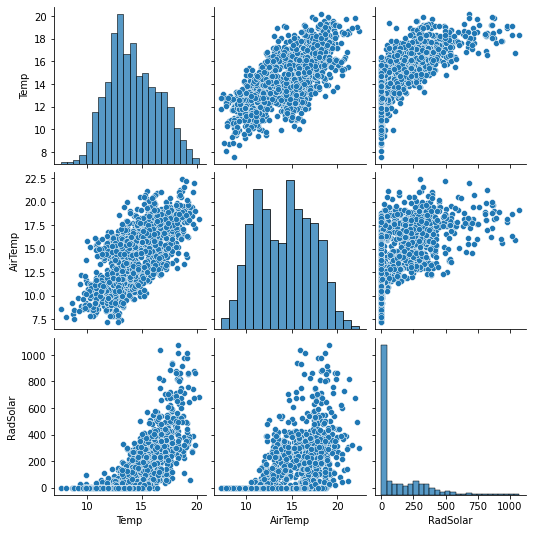

In [9]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(shuffle_data[["Temp", "AirTemp", "RadSolar"]])
plt.show()

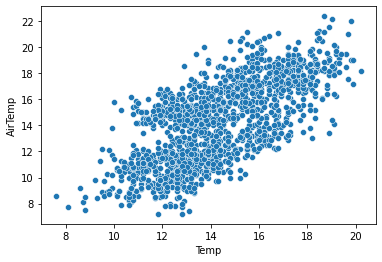

In [14]:
sns.scatterplot(data=shuffle_data, x="Temp",y="AirTemp")
plt.show()

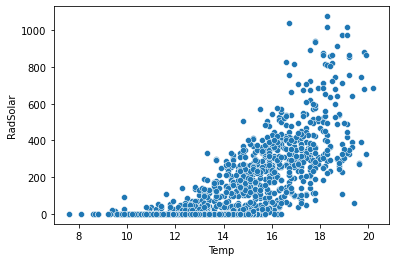

In [15]:
sns.scatterplot(data=shuffle_data, x="Temp",y="RadSolar")
plt.show()

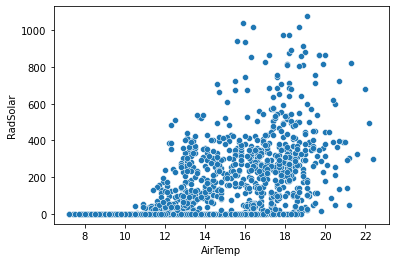

In [16]:
sns.scatterplot(data=shuffle_data, x="AirTemp",y="RadSolar")
plt.show()

In [22]:
# Función para graficar predicciones
def graficas(variable_x = ["AirTemp"], variable_y = "Temp"):

    # Se dividen los datos
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    #dataX = shuffle_data.select_dtypes(include=numerics).drop(columns="Temp")
    dataX = shuffle_data[variable_x]
    dataY = shuffle_data["Temp"]

    train_size = int(len(dataX)*0.8)
    test_size = len(dataX) - train_size

    trainX, testX = dataX[0:train_size], dataX[test_size:len(dataX)]
    trainY, testY = dataY[0:train_size], dataY[test_size:len(dataY)]

    # Modelo
    clf = linear_model.LinearRegression()
    clf.fit(trainX, trainY)
    yPredict = clf.predict(testX)

    # Errores
    rmse = math.sqrt(mean_squared_error(testY, yPredict))
    print("RMSE:", rmse)

    mae = mean_absolute_error(testY, yPredict)
    print("MAE:", mae)

    r2 = r2_score(testY,yPredict) 
    print("R2:", r2)

    x=range(len(testY))

    # Gráficas
    plt.plot(x[:100], testY[:100])
    plt.plot(x[:100], yPredict[:100])
    plt.show()

RMSE: 1.6346441612563272
MAE: 1.3293746211549842
R2: 0.4757305333180426


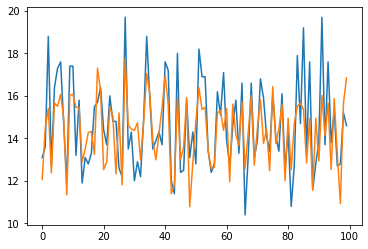

In [23]:
graficas(variable_x = ["AirTemp"])

RMSE: 1.301268025701298
MAE: 1.0381641679513263
R2: 0.6677678724840406


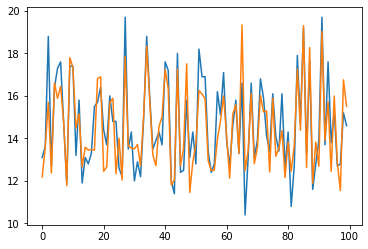

In [24]:
graficas(variable_x = ["AirTemp", "RadSolar"])

RMSE: 0.43551264193782124
MAE: 0.3319562093788355
R2: 0.9627857181664726


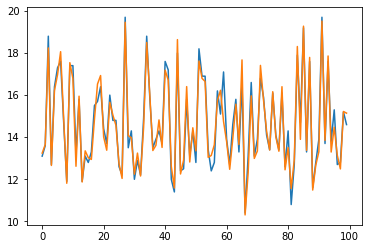

In [33]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
all_variables = shuffle_data.select_dtypes(include=numerics).columns.tolist()
all_variables.remove("Temp")
graficas(all_variables)

## Normalizando

In [32]:
from sklearn import preprocessing
x = shuffle_data.select_dtypes(include=numerics).values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_shuffle_data = pd.DataFrame(x_scaled, columns = shuffle_data.select_dtypes(include=numerics).columns)
normalized_shuffle_data

,Temp,TempAlta,TempBaja,RadSolar,EnergíaSolar,RadSolarAlta,AirTemp,AlbedoDaily,Azimuth,CloudOpacity,...,Ebh,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith
0,0.857143,0.685315,0.658333,0.589219,0.589220,0.678238,0.671053,0.0,0.155405,0.084895,...,0.684486,0.863504,0.856545,0.893574,0.834146,0.699130,0.985312,0.281609,0.205128,0.076389
1,0.603175,0.482517,0.600000,0.385688,0.385720,0.453271,0.592105,0.0,0.932432,0.599779,...,0.005241,0.263311,0.283770,0.279116,0.400000,0.464348,0.017136,0.396552,0.384615,0.277778
2,0.722222,0.594406,0.691667,0.966543,0.966623,0.817757,0.572368,0.0,0.635135,0.205072,...,0.462264,0.812197,0.812565,0.801205,0.263415,0.398261,0.063647,0.362069,0.743590,0.041667
3,0.531746,0.412587,0.558333,0.142193,0.142147,0.156208,0.322368,1.0,0.189189,0.552370,...,0.000000,0.459826,0.496335,0.476908,0.336585,0.766957,0.041616,0.298851,0.410256,0.097222
4,0.253968,0.174825,0.266667,0.000000,0.000000,0.000000,0.302632,0.0,0.898649,0.374862,...,0.000000,0.000000,0.000000,0.000000,0.487805,0.798261,0.040392,0.327586,0.230769,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.666667,0.524476,0.683333,0.060409,0.060380,0.066756,0.375000,0.0,0.952703,0.169791,...,0.008386,0.077444,0.079581,0.079317,0.400000,0.737391,0.029376,0.396552,0.487179,0.472222
1456,0.341270,0.286713,0.350000,0.000000,0.000000,0.000000,0.171053,1.0,0.581081,0.345094,...,0.000000,0.000000,0.000000,0.000000,0.312195,0.853913,0.053856,0.272989,0.384615,0.951389
1457,0.595238,0.454545,0.433333,0.177509,0.177468,0.166889,0.638158,0.0,0.013514,0.410143,...,0.059748,0.397870,0.423037,0.441767,0.878049,0.888696,0.975520,0.258621,0.205128,0.256944
1458,0.500000,0.377622,0.500000,0.000000,0.000000,0.000000,0.552632,0.0,0.763514,0.339581,...,0.000000,0.000000,0.000000,0.000000,0.824390,0.994783,0.974296,0.255747,0.282051,0.930556


In [12]:
# Se dividen los datos

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

#dataX = normalized_shuffle_data.select_dtypes(include=numerics).drop(columns="Temp")
dataX = shuffle_data[["AirTemp"]]
dataY = normalized_shuffle_data["Temp"]

train_size = int(len(dataX)*0.8)
test_size = len(dataX) - train_size

trainX, testX = dataX[0:train_size], dataX[test_size:len(dataX)]
trainY, testY = dataY[0:train_size], dataY[test_size:len(dataY)]

RMSE: 0.127999264597407
MAE: 0.10447087625592379
R2: 0.47149750773942456


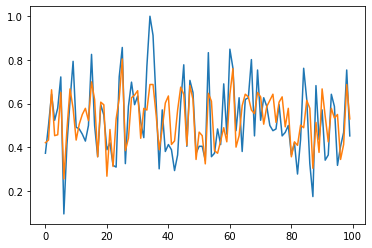

In [13]:
# Modelo
clf = linear_model.LinearRegression()
clf.fit(trainX, trainY)
yPredict = clf.predict(testX)

# Errores
rmse = math.sqrt(mean_squared_error(testY, yPredict))
print("RMSE:", rmse)

mae = mean_absolute_error(testY, yPredict)
print("MAE:", mae)

r2 = r2_score(testY,yPredict) 
print("R2:", r2)

x=range(len(testY))

# Gráficas
plt.plot(x[:100], testY[:100])
plt.plot(x[:100], yPredict[:100])
plt.show()

In [14]:
coeficientes = list(zip(dataX.columns, clf.coef_))
sorted(coeficientes, key=lambda x: -abs(x[1]))

[('AirTemp', 0.04035403402594959)]

## Con datos de wetransfer

In [15]:
wetransfer = pd.read_csv("datos_procesados.csv", encoding="latin-1")
wetransfer = wetransfer.set_index("Date & Time")
wetransfer_numeric = wetransfer.select_dtypes(include=numerics)

shuffle_wetransfer_numeric = wetransfer_numeric.sample(frac=1)

shuffle_wetransfer_numeric = shuffle_wetransfer_numeric.dropna()

shuffle_wetransfer_numeric.head()

,Temp - °C,Temp. Alta - °C,Temp. Baja - °C,Hum - %,Punto de rocío - °C,Wet Bulb - °C,Velocidad del viento - m/s,Viento Corriente - m,Alta velocidad del viento - m/s,Viento Frío - °C,...,Tasa de lluvia - mm/h,Rad Solar - W/m^2,Energía solar,Rad Solar Alta - W/m^2,ET - mm,El índice UV - Index,Dosis de UV,Alto índice UV - Index,Días-grado de calentamiento,Días-grado de enfriamiento
Date & Time,,,,,,,,,,,,,,,,,,,,,
2020-10-15 13:00:00,16.8,18.1,16.6,60.0,9.0,11.1,3.6,3.58,9.4,16.2,...,0.0,309.0,26.59,541.0,0.23,4.1,1.76,6.4,0.065,0.000
2020-11-30 03:00:00,10.5,11.2,10.5,84.0,7.9,8.8,1.3,1.34,4.9,10.4,...,0.0,0.0,0.00,0.0,0.03,0.0,0.00,0.0,0.326,0.000
2019-07-09 02:00:00,10.4,10.4,10.2,77.0,6.5,7.9,2.2,2.24,5.8,9.5,...,0.0,0.0,0.00,0.0,0.03,0.0,0.00,0.0,0.596,0.000
2020-01-04 17:00:00,18.8,19.3,18.7,64.0,11.9,13.6,1.8,1.79,4.9,18.8,...,0.0,348.0,29.94,461.0,0.25,0.7,0.30,1.3,0.000,0.021
2019-08-08 18:00:00,13.2,13.2,12.8,75.0,8.8,10.2,3.1,3.13,9.4,12.3,...,0.0,19.0,1.63,32.0,0.03,0.0,0.00,0.0,0.215,0.000


In [39]:
#dataX = shuffle_data.select_dtypes(include=numerics).drop(columns="Temp")
dataX = shuffle_wetransfer_numeric.drop(columns='Temp - °C')
#dataX = shuffle_wetransfer_numeric[["Velocidad del viento - m/s"]]
dataY = shuffle_wetransfer_numeric['Temp - °C']

train_size = int(len(dataX)*0.8)
test_size = len(dataX) - train_size

trainX, testX = dataX[0:train_size], dataX[test_size:len(dataX)]
trainY, testY = dataY[0:train_size], dataY[test_size:len(dataY)]

RMSE: 0.031410194639069425
MAE: 0.014573939179799225
R2: 0.9998592774667298


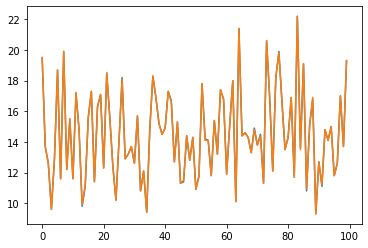

In [40]:
# Modelo
clf = linear_model.LinearRegression()
clf.fit(trainX, trainY)
yPredict = clf.predict(testX)

# Errores
rmse = math.sqrt(mean_squared_error(testY, yPredict))
print("RMSE:", rmse)

mae = mean_absolute_error(testY, yPredict)
print("MAE:", mae)

r2 = r2_score(testY,yPredict) 
print("R2:", r2)

x=range(len(testY))

# Gráficas
plt.plot(x[:100], testY[:100])
plt.plot(x[:100], yPredict[:100])
plt.show()

In [19]:
coeficientes = list(zip(dataX.columns, clf.coef_))
sorted(coeficientes, key=lambda x: -abs(x[1]))

[('Índice de calor - °C', 0.9764747446784073),
 ('Viento Frío - °C', 0.9212153912936061),
 ('THW Index - °C', -0.9081409233735313),
 ('Energía solar', 0.08836647985860482),
 ('Días-grado de enfriamiento', 0.0312418596532683),
 ('Dosis de UV', 0.02878543070209386),
 ('Viento Corriente - m', 0.02532401369473946),
 ('Velocidad del viento - m/s', -0.018239325440893708),
 ('Wet Bulb - °C', 0.017104409537583846),
 ('Días-grado de calentamiento', -0.015455414218693515),
 ('ET - mm', 0.014813752686335084),
 ('El índice UV - Index', -0.011316881732131336),
 ('Punto de rocío - °C', -0.010884185184847737),
 ('Rad Solar - W/m^2', -0.007601070695405115),
 ('Temp. Baja - °C', 0.0025854164153406075),
 ('Hum - %', -0.002019458457951173),
 ('Barómetro - mm Hg', 0.0009542407937412492),
 ('Alto índice UV - Index', -0.0007463476628989077),
 ('THSW  índice - °C', 0.0007332810790026998),
 ('Alta velocidad del viento - m/s', -0.000708446781853915),
 ('Temp.\xa0Alta - °C', -0.0003737348527040234),
 ('Lluvia -

In [47]:
# Son iguales
en_sitio = wetransfer_numeric[['Temp - °C']]
satelitales = data[["Temp"]]

df = pd.merge(en_sitio, satelitales, left_index=True, right_index=True)

(df['Temp - °C'] == df['Temp']).all()

True

In [56]:
enel = pd.read_excel("Datos Tesis/TEMP MODULE-2.xlsx")
enel = enel.drop(enel.index[0])
enel

,Unnamed: 0,SUB 2,SUB 3,SUB 6,SUB 9,SUB 10,SUB 12
1,2020-08-10 00:00:00,26.7546,0 FA,26.4704,25.8349,25.9908,26.1084
2,2020-08-10 00:01:00,26.8613,0 FA,26.4349,25.8349,25.9551,26.0728
3,2020-08-10 00:02:00,26.8613,0 FA,26.4349,25.7638,25.9194,26.0017
4,2020-08-10 00:03:00,26.7902,0 FA,26.3993,25.7282,25.9551,25.9662
5,2020-08-10 00:04:00,26.6835,0 FA,26.3993,25.6571,25.9551,25.9306
...,...,...,...,...,...,...,...
268494,2021-02-12 10:56:00,52.6137,55.055,55.705,51.9749,52.0121,53.9306
268495,2021-02-12 10:57:00,53.3734,55.2,55.7775,51.9749,52.0121,54.148
268496,2021-02-12 10:58:00,53.9887,55.4177,55.415,51.9749,52.2296,54.6192
268497,2021-02-12 10:59:00,54.5318,55.7805,55.3425,51.1797,52.6284,54.1842


In [60]:
enel = enel.rename(columns={'Unnamed: 0':"Fecha"})
enel = enel.set_index('Fecha')
enel

,SUB 2,SUB 3,SUB 6,SUB 9,SUB 10,SUB 12
Fecha,,,,,,
2020-08-10 00:00:00,26.7546,0 FA,26.4704,25.8349,25.9908,26.1084
2020-08-10 00:01:00,26.8613,0 FA,26.4349,25.8349,25.9551,26.0728
2020-08-10 00:02:00,26.8613,0 FA,26.4349,25.7638,25.9194,26.0017
2020-08-10 00:03:00,26.7902,0 FA,26.3993,25.7282,25.9551,25.9662
2020-08-10 00:04:00,26.6835,0 FA,26.3993,25.6571,25.9551,25.9306
...,...,...,...,...,...,...
2021-02-12 10:56:00,52.6137,55.055,55.705,51.9749,52.0121,53.9306
2021-02-12 10:57:00,53.3734,55.2,55.7775,51.9749,52.0121,54.148
2021-02-12 10:58:00,53.9887,55.4177,55.415,51.9749,52.2296,54.6192


In [65]:
enel.index.min()

Timestamp('2020-08-10 00:00:00')

In [66]:
enel.index.max()

Timestamp('2021-02-12 11:00:00')

In [67]:
satelitales.index.min()

Timestamp('2019-05-07 17:00:00')

In [68]:
satelitales.index.max()

Timestamp('2019-07-08 09:00:00')

In [61]:
# No hay fechas en común
df = pd.merge(enel, satelitales, left_index=True, right_index=True)
df

,SUB 2,SUB 3,SUB 6,SUB 9,SUB 10,SUB 12,Temp


## Se prueba omitiendo los ceros entre las 6pm y 6am

In [20]:
# Se prueba omitiendo los ceros entre las 6pm y 6am
dataX = dataX[datosSDSinCompletar.RadSolar!=0]
dataY = datosSDSinCompletar.RadSolar[datosSDSinCompletar.RadSolar!=0]

# Se dividen los datos
train_size = int(len(dataX)*0.8)
test_size = len(dataX) - train_size

trainX, testX = dataX[0:train_size], dataX[test_size:len(dataX)]
trainY, testY = dataY[0:train_size], dataY[test_size:len(dataY)]

# Modelo de regresión lineal
clf = linear_model.LinearRegression()
clf.fit(trainX, trainY)
yPredict = clf.predict(testX)

# Cálculos de errores
rmse = math.sqrt(mean_squared_error(testY,yPredict))
print(rmse)

r2 = r2_score(testY,yPredict) 
print(r2)

# Se grafica
x=range(len(testY))
plt.plot(x, testY)
plt.plot(x, yPredict)
plt.show()

<ipython-input-20-e04ef4a7d39b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataX = dataX[datosSDSinCompletar.RadSolar!=0]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

## Se prueba con las 3 irradiaciones

In [ ]:
# solo DHI, DNI y GHI de SolarCast
dataX= pd.DataFrame({'Dhi':datosSolarSinCompletar.Dhi, 'Dni':datosSolarSinCompletar.Dni, 'Ghi':datosSolarSinCompletar.Ghi})
dataY= datosSDSinCompletar.RadSolar

# Se dividen los datos
train_size = int(len(dataX)*0.8)
test_size = len(dataX) - train_size

trainX, testX = dataX[0:train_size], dataX[test_size:len(dataX)]
trainY, testY = dataY[0:train_size], dataY[test_size:len(dataY)]

# Se crea y ajusta el modelo de regresión
clf = linear_model.LinearRegression()
clf.fit(trainX, trainY)
yPredict = clf.predict(testX)

# Se calculan los errores
rmse = math.sqrt(mean_squared_error(testY,yPredict))
print(rmse)

r2 = r2_score(testY,yPredict) 
print(r2)

# Se grafica
x=range(len(testY))
plt.plot(x, testY)
plt.plot(x, yPredict)
plt.show()

In [ ]:
# Se corrigen los ceros
correccionZeros = yPredict[testY==0]
copiaYPredict = yPredict
copiaYPredict[testY==0]=0

# Se recalculan los errores
rmse = math.sqrt(mean_squared_error(testY,copiaYPredict))
print(rmse)

r2 = r2_score(testY,copiaYPredict) 
print(r2)

# Se grafica
x=range(len(testY))
plt.plot(x, testY)
plt.plot(x, copiaYPredict)
plt.show()

# Random Forest Regressor
## Se prueba con todos los datos disponibles

In [ ]:
dataXTodo = shuffle_data.select_dtypes(include=numerics).drop(columns="Temp")
dataX = shuffle_data[["AirTemp"]]
dataY = shuffle_data["Temp"]

train_size = int(len(dataX)*0.8)
test_size = len(dataX) - train_size

trainXTodo, testXTodo = dataXTodo[0:train_size], dataXTodo[test_size:len(dataX)]
trainY, testY = dataY[0:train_size], dataY[test_size:len(dataY)]
model_rfTodo = RandomForestRegressor(n_estimators=100, max_features=4, min_samples_leaf=10,random_state=0, n_jobs=2)
model_rfTodo.fit(trainXTodo, trainY)

yPredictTodo = model_rfTodo.predict(testXTodo)

rmse = math.sqrt(mean_squared_error(testY,yPredictTodo))
print("RMSE:", rmse)

mae = mean_absolute_error(testY, yPredictTodo)
print("MAE:", mae)

r2 = r2_score(testY, yPredictTodo) 
print("R2:", r2)

x=range(len(testY))
plt.plot(x, testY)
plt.plot(x, yPredictTodo)
plt.show()

In [ ]:
dataXTodo = shuffle_wetransfer_numeric.drop(columns='Temp - °C')
dataX = shuffle_wetransfer_numeric[["Temp - °C"]]
dataY = shuffle_wetransfer_numeric['Temp - °C']

train_size = int(len(dataX)*0.8)
test_size = len(dataX) - train_size

trainXTodo, testXTodo = dataXTodo[0:train_size], dataXTodo[test_size:len(dataX)]
trainY, testY = dataY[0:train_size], dataY[test_size:len(dataY)]
model_rfTodo = RandomForestRegressor(n_estimators=100, max_features=4, min_samples_leaf=10,random_state=0, n_jobs=2)
model_rfTodo.fit(trainXTodo, trainY)

yPredictTodo = model_rfTodo.predict(testXTodo)

rmse = math.sqrt(mean_squared_error(testY,yPredictTodo))
print("RMSE:", rmse)

mae = mean_absolute_error(testY, yPredictTodo)
print("MAE:", mae)

r2 = r2_score(testY, yPredictTodo) 
print("R2:", r2)

x=range(len(testY))
plt.plot(x[:24*7], testY[:24*7])
plt.plot(x[:24*7], yPredictTodo[:24*7])
plt.xticks(np.arange(0, 24*7, step=24),["L","M","X","J","V","S","D"])
plt.show()

In [ ]:
# Se 
#dataXTodo= pd.DataFrame({'Temp':datosSDSinCompletar.Temp, 'VelocidadViento':datosSDSinCompletar.VelocidadViento, 'Dhi':datosSolarSinCompletar.Dhi, 'Dni':datosSolarSinCompletar.Dni, 'Ghi':datosSolarSinCompletar.Ghi})
#dataY= datosSDSinCompletar.RadSolar

dataXTodo = shuffle_data.select_dtypes(include=numerics).drop(columns="Temp")
dataX = shuffle_data[["AirTemp"]]
dataY = shuffle_data["Temp"]

train_size = int(len(dataX)*0.8)
test_size = len(dataX) - train_size

trainXTodo, testXTodo = dataXTodo[0:train_size], dataXTodo[test_size:len(dataX)]
trainY, testY = dataY[0:train_size], dataY[test_size:len(dataY)]
model_rfTodo = RandomForestRegressor(n_estimators=100, max_features=4, min_samples_leaf=10,random_state=0, n_jobs=2)
model_rfTodo.fit(trainXTodo, trainY)

yPredictTodo = model_rfTodo.predict(testXTodo)

rmse = math.sqrt(mean_squared_error(testY,yPredictTodo))
print(rmse)

r2 = r2_score(testY, yPredictTodo) 
print(r2)

x=range(len(testY))
plt.plot(x, testY)
plt.plot(x, yPredictTodo)
plt.show()

#%% Más grafiquitas
x=range(len(datosSolarSinCompletar.WindSpeed10m[24*7*2:24*7*3]))
plt.plot(x, datosSolarSinCompletar.WindSpeed10m[24*7*2:24*7*3])
plt.plot(x, datosSDSinCompletar.VelocidadViento[24*7*2:24*7*3])
plt.show()
#%%
x=range(len(testY[24*7*2:24*7*3]))
plt.plot(x, testY[24*7*2:24*7*3])
plt.plot(x, yPredict[24*7*2:24*7*3])
plt.show()
#%%
x=range(len(dataX[test_size+24*7*3:test_size+24*7*4]))
plt.plot(x, dataX.Ghi[test_size+24*7*3:test_size+24*7*4])
plt.plot(x, dataY[test_size+24*7*3:test_size+24*7*4])
plt.show()

#%%
rmse = math.sqrt(mean_squared_error(datosSDSinCompletar.RadSolar,datosSolarSinCompletar.Ghi))
print(rmse)
r2 = r2_score(datosSDSinCompletar.RadSolar,datosSolarSinCompletar.Ghi) 
print(r2)
#%%
rmse = math.sqrt(mean_squared_error(datosSolarSinCompletar.WindSpeed10m,datosSDSinCompletar.VelocidadViento))
print('rMSE velocidad viento:'+str(rmse))
r2 = r2_score(datosSDSinCompletar.VelocidadViento, datosSolarSinCompletar.WindSpeed10m) 
print('r2 velocidad viento:'+str(r2))
rmse = math.sqrt(mean_squared_error(datosSDSinCompletar.Temp, datosSolarSinCompletar.AirTemp))
print('rMSE temperatura'+ str(rmse))
r2 = r2_score( datosSDSinCompletar.Temp, datosSolarSinCompletar.AirTemp) 
print('r2 temperatura'+ str(r2))
#%%
x=range(len(datosSolarSinCompletar.AirTemp[24*7*2:24*7*3]))
plt.plot(x, datosSolarSinCompletar.AirTemp[24*7*2:24*7*3])
plt.plot(x, datosSDSinCompletar.Temp[24*7*2:24*7*3])
plt.show()

In [ ]:
#%%
dataX= pd.DataFrame({'AirTemp': datosSolarSinCompletar.AirTemp, 'Dhi':datosSolarSinCompletar.Dhi, 'Dni':datosSolarSinCompletar.Dni, 'Ghi':datosSolarSinCompletar.Ghi})
dataY= datosSDSinCompletar.RadSolar

train_size = int(len(dataX)*0.8)
test_size = len(dataX) - train_size

trainX, testX = dataX[0:train_size], dataX[test_size:len(dataX)]
trainY, testY = dataY[0:train_size], dataY[test_size:len(dataY)]
model_rf = RandomForestRegressor(n_estimators=100,  min_samples_leaf=10,random_state=0, n_jobs=2)
model_rf.fit(trainX, trainY)

yPredictTrain = model_rf.predict(trainX)
yPredictTest = model_rf.predict(testX)

rmseTrain = math.sqrt(mean_squared_error(trainY,yPredictTrain))
rmseTest = math.sqrt(mean_squared_error(testY,yPredictTest))
print('RMSE Train: '+str(rmseTrain))
print('RMSE Test: '+str(rmseTest))

r2Train = r2_score(trainY,yPredictTrain) 
r2Test = r2_score(testY,yPredictTest) 
print('r2 Train: '+str(r2Train))
print('r2 Test: '+str(r2Test))

In [ ]:
#%%
dataX= pd.DataFrame({'SurfacePressure':datosSolarSinCompletar.SurfacePressure,'RelativeHumidity':datosSolarSinCompletar.RelativeHumidity,'CloudOpacity': datosSolarSinCompletar.CloudOpacity, 'WindSpeed10m': datosSolarSinCompletar.WindSpeed10m, 'AirTemp':datosSolarSinCompletar.AirTemp, 'Dhi':datosSolarSinCompletar.Dhi, 'Dni':datosSolarSinCompletar.Dni, 'Ghi':datosSolarSinCompletar.Ghi})
dataY= datosSDSinCompletar.RadSolar

train_size = int(len(dataX)*0.8)
test_size = len(dataX) - train_size

trainX, testX = dataX[0:train_size], dataX[test_size:len(dataX)]
trainY, testY = dataY[0:train_size], dataY[test_size:len(dataY)]

model_rf = RandomForestRegressor(n_estimators=100, max_features=4, min_samples_leaf=10,random_state=0, n_jobs=2)
model_rf.fit(trainX, trainY)

yPredictTrain = model_rf.predict(trainX)
yPredictTest = model_rf.predict(testX)

rmseTrain = math.sqrt(mean_squared_error(trainY,yPredictTrain))
rmseTest = math.sqrt(mean_squared_error(testY,yPredictTest))
print('RMSE Train: '+str(rmseTrain))
print('RMSE Test: '+str(rmseTest))

r2Train = r2_score(trainY,yPredictTrain) 
r2Test = r2_score(testY,yPredictTest) 
print('r2 Train: '+str(r2Train))
print('r2 Test: '+str(r2Test))

x=range(len(testY[test_size+24*7*3:test_size+24*7*4]))
plt.plot(x, testY[test_size+24*7*3:test_size+24*7*4])
plt.plot(x, yPredictTest[test_size+24*7*3:test_size+24*7*4])
plt.show()

In [ ]:
#%%
# LINEAR REGRESION
#%%
clf = linear_model.LinearRegression()
clf.fit(trainX, trainY)
yPredict = clf.predict(testX)

x=range(len(testY[test_size+24*7*3:test_size+24*7*4]))
plt.plot(x, testY[test_size+24*7*3:test_size+24*7*4])
plt.plot(x, yPredict[test_size+24*7*3:test_size+24*7*4])
plt.show()

rmse = math.sqrt(mean_squared_error(testY,yPredict))
print(rmse)

r2 = r2_score(testY,yPredict) 
print(r2)

In [ ]:
#%% 
# GRIDSEARCH CV

from sklearn.model_selection import GridSearchCV
estimator = RandomForestRegressor()
param_grid = {"n_estimators": [10,50,100,200], "max_features": ["auto", "sqrt", "log2"],"min_samples_split" : [2,4,8],"bootstrap": [True, False]}
grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)
grid.fit(trainX, trainY)
print(grid.best_score_)
print(grid.best_params_)

#%%
x=range(len(dataX[test_size+24*7*3:test_size+24*7*4]))
plt.plot(x, dataX.Ghi[test_size+24*7*3:test_size+24*7*4])
plt.plot(x, dataY[test_size+24*7*3:test_size+24*7*4])
plt.show()

#### %% Sofía está muy cansada y llegó hasta aquí
datosPredecir1 = datosfechaSD.loc['2019-05-12 2:00:00':'2019-05-12 8:00:00']
datosPredecir2 = datosfechaSD.loc['2019-05-16  4:00:00':'2019-05-16 10:00:00']
datosPredecir3 = datosfechaSD.loc['2019-05-29  7:00:00':'2019-05-29 13:00:00']
datosPredecir = datosPredecir1
datosPredecir=datosPredecir.append(datosPredecir2)
datosPredecir=datosPredecir.append(datosPredecir3)

datosPredecirSolar1 =  dataFechaSolarCastArreglado.loc['2019-05-12T02:00:00Z':'2019-05-12T08:00:00Z']
datosPredecirSolar2 = dataFechaSolarCastArreglado.loc['2019-05-16T04:00:00Z':'2019-05-16T10:00:00Z']
datosPredecirSolar3 = dataFechaSolarCastArreglado.loc['2019-05-29T07:00:00Z':'2019-05-29T13:00:00Z']
#%%
datosPredecirSolar = datosPredecirSolar1
datosPredecirSolar=datosPredecirSolar.append(datosPredecirSolar2)
datosPredecirSolar=datosPredecirSolar.append(datosPredecirSolar3)
#%%
datosPredecirSolar1 = datosPredecirSolar1.set_index(datosPredecir1.index)
datosPredecirSolar2 = datosPredecirSolar2.set_index(datosPredecir2.index)
datosPredecirSolar3 = datosPredecirSolar3.set_index(datosPredecir3.index)

#%% falla porque no hay los datos en sitio
dataXTodo= pd.DataFrame({'Temp':datosPredecir.Temp, 'VelocidadViento':datosPredecir.VelocidadViento, 'Dhi':datosPredecirSolar.Dhi, 'Dni':datosPredecirSolar.Dni, 'Ghi':datosPredecirSolar.Ghi})
yPredictTodo = model_rfTodo.predict(dataXTodo) 
#%%
dataX1= pd.DataFrame({'SurfacePressure':datosPredecirSolar1.SurfacePressure,'RelativeHumidity':datosPredecirSolar1.RelativeHumidity,'CloudOpacity': datosPredecirSolar1.CloudOpacity, 'WindSpeed10m': datosPredecirSolar1.WindSpeed10m, 'AirTemp':datosPredecirSolar1.AirTemp, 'Dhi':datosPredecirSolar1.Dhi, 'Dni':datosPredecirSolar1.Dni, 'Ghi':datosPredecirSolar1.Ghi})
dataX2= pd.DataFrame({'SurfacePressure':datosPredecirSolar2.SurfacePressure,'RelativeHumidity':datosPredecirSolar2.RelativeHumidity,'CloudOpacity': datosPredecirSolar2.CloudOpacity, 'WindSpeed10m': datosPredecirSolar2.WindSpeed10m, 'AirTemp':datosPredecirSolar2.AirTemp, 'Dhi':datosPredecirSolar2.Dhi, 'Dni':datosPredecirSolar2.Dni, 'Ghi':datosPredecirSolar2.Ghi})
dataX3= pd.DataFrame({'SurfacePressure':datosPredecirSolar3.SurfacePressure,'RelativeHumidity':datosPredecirSolar3.RelativeHumidity,'CloudOpacity': datosPredecirSolar3.CloudOpacity, 'WindSpeed10m': datosPredecirSolar3.WindSpeed10m, 'AirTemp':datosPredecirSolar3.AirTemp, 'Dhi':datosPredecirSolar3.Dhi, 'Dni':datosPredecirSolar3.Dni, 'Ghi':datosPredecirSolar3.Ghi})

yPredict1 = model_rf.predict(dataX1)
yPredict2 = model_rf.predict(dataX2)
yPredict3 = model_rf.predict(dataX3)
#%%

x=range(len(yPredict))
plt.plot(x,datosPredecirSolar.Ghi)
plt.plot(x,yPredict)
#%%
datosCompletos = np.concatenate((np.array(datosfechaSD.loc['2019-05-07 17:00:00':'2019-05-12  1:00:00'].RadSolar),
                                yPredict1,
                                np.array(datosfechaSD.loc['2019-05-12 9:00:00':'2019-05-16  3:00:00'].RadSolar),
                                yPredict2,
                                np.array(datosfechaSD.loc['2019-05-16 11:00:00':'2019-05-29  6:00:00'].RadSolar),
                                yPredict3,
                                np.array(datosfechaSD.loc['2019-05-29 14:00:00':'2019-07-8  9:00:00'].RadSolar)))
#%%
datosCompletosDF = pd.DataFrame({'DateTime':datosSD.DateTime[1:len(datosSD)], 'Radiacion':datosCompletos})
datosCompletosDF.to_csv('DatosSDCompletados.csv', header=True, index=False)
#%%
datosIDEAMAuto = pd.read_csv('datosIDEAMAuto.csv')
completo = pd.read_csv('../Tesis/DatosKioskoNSRDB/DatosUnidosMediaHoraConBisiestos.csv')
#%%
fechasNSRDB= completo.Year.astype(int).astype(str)+'-'+completo.Month.astype(int).astype(str)+'-'+completo.Day.astype(int).astype(str)+'T'+completo.Hour.astype(int).astype(str)+':00:00Z'
completo = completo.set_index(fechasNSRDB)
#%%
prueba = datetime(int(completo.Year[0]), int(completo.Month[0]), int(completo.Day[0]) , int(completo.Hour[0]), 00 )
print(prueba)
#%%
prueba2 = datetime.strptime(datosIDEAMAuto.Fecha[0], '%Y-%m-%d %H:%M')
print(prueba2)
#%%
datosCompatiblesNRELeIDEAMAuto =  completo.loc['2013-12-1T0:00:00Z':'2018-10-1T0:00:00Z']

#%%
dataXIDEAMAuto = []
dataYIDEAMAuto = []
dataPredecirIDEAMAuto = []
i = 0
j = 0
while (i < len(datosCompatiblesNRELeIDEAMAuto)):
    fechaNREL = datetime(int(datosCompatiblesNRELeIDEAMAuto.Year[i]), int(datosCompatiblesNRELeIDEAMAuto.Month[i]), int(datosCompatiblesNRELeIDEAMAuto.Day[i]) , int(datosCompatiblesNRELeIDEAMAuto.Hour[i]), 00 )
    fechaIDEAM = datetime.strptime(datosIDEAMAuto.Fecha[j], '%Y-%m-%d %H:%M')
    if(fechaNREL == fechaIDEAM):
        dataXIDEAMAuto.append(datosCompatiblesNRELeIDEAMAuto.iloc[i])
        dataYIDEAMAuto.append(datosIDEAMAuto.Valor[j])
        i = i+1
        j = j+1
    else:
        dataPredecirIDEAMAuto.append(datosCompatiblesNRELeIDEAMAuto.iloc[i])
        i = i+1
dataXIDEAMAuto = pd.DataFrame(dataXIDEAMAuto)
dataPredecirIDEAMAuto = pd.DataFrame(dataPredecirIDEAMAuto)   
#%% 
r2 = r2_score(dataYIDEAMAuto, dataXIDEAMAuto.GHI)
#%%
dataXfeaturesIDEAMAuto = pd.DataFrame({'DHI':dataXIDEAMAuto.DHI,'DNI':dataXIDEAMAuto.DNI, 'GHI':dataXIDEAMAuto.GHI})

train_sizeIDEAMAuto = int(len(dataXfeaturesIDEAMAuto)*0.8)
test_sizeIDEAMAuto = len(dataXfeaturesIDEAMAuto) - train_sizeIDEAMAuto

trainXIDEAMAuto, testXIDEAMAuto = dataXfeaturesIDEAMAuto[0:train_sizeIDEAMAuto], dataXfeaturesIDEAMAuto[test_sizeIDEAMAuto:len(dataXIDEAMAuto)]
trainYIDEAMAuto, testYIDEAMAuto = dataYIDEAMAuto[0:train_sizeIDEAMAuto], dataYIDEAMAuto[test_sizeIDEAMAuto:len(dataYIDEAMAuto)]

model_rfIDEAMAuto = RandomForestRegressor(n_estimators=100, min_samples_leaf=10,random_state=0, n_jobs=2)
model_rfIDEAMAuto.fit(trainXIDEAMAuto, trainYIDEAMAuto)

yPredictIDEAMAuto = model_rfIDEAMAuto.predict(testXIDEAMAuto)

rmseIDEAMAuto = math.sqrt(mean_squared_error(testYIDEAMAuto,yPredictIDEAMAuto))
print(rmseIDEAMAuto)

r2IDEAMAuto = r2_score(testYIDEAMAuto,yPredictIDEAMAuto) 
print(r2)

xIDEAMAuto=range(len(testYIDEAMAuto[test_size+24*7*3:test_sizeIDEAMAuto+24*7*4]))
plt.plot(xIDEAMAuto, testYIDEAMAuto[test_size+24*7*3:test_sizeIDEAMAuto+24*7*4])
plt.plot(xIDEAMAuto, yPredictIDEAMAuto[test_size+24*7*3:test_sizeIDEAMAuto+24*7*4])
plt.show()

#%%
dataXfeatures1IDEAMAuto = pd.DataFrame({'DHI':dataXIDEAMAuto.DHI,'DNI':dataXIDEAMAuto.DNI, 'GHI':dataXIDEAMAuto.GHI, 'Clearsky DHI':dataXIDEAMAuto['Clearsky DHI'],'Clearsky DNI':dataXIDEAMAuto['Clearsky DNI'],'Clearsky GHI':dataXIDEAMAuto['Clearsky GHI'], 'Temperature':dataXIDEAMAuto.Temperature,'Wind Speed':dataXIDEAMAuto['Wind Speed'], 'Cloud Type':dataXIDEAMAuto['Cloud Type'], 'Relative Humidity':dataXIDEAMAuto['Relative Humidity'], 'Precipitable Water':dataXIDEAMAuto['Precipitable Water']})

train_sizeIDEAMAuto = int(len(dataXIDEAMAuto)*0.8)
test_sizeIDEAMAuto = len(dataXIDEAMAuto) - train_sizeIDEAMAuto

trainX1IDEAMAuto, testX1IDEAMAuto = dataXfeatures1IDEAMAuto[0:train_sizeIDEAMAuto], dataXfeatures1IDEAMAuto[test_sizeIDEAMAuto:len(dataXfeatures1IDEAMAuto)]
trainYIDEAMAuto, testYIDEAMAuto = dataYIDEAMAuto[0:train_sizeIDEAMAuto], dataYIDEAMAuto[test_sizeIDEAMAuto:len(dataYIDEAMAuto)]

model_rf1IDEAMAuto = RandomForestRegressor(n_estimators=100,max_features=4, min_samples_leaf=10,random_state=0, n_jobs=2)
model_rf1IDEAMAuto.fit(trainX1IDEAMAuto, trainYIDEAMAuto)
yPredictRandomForestIDEAMAuto = model_rf1IDEAMAuto.predict(testX1IDEAMAuto)
rmseRandomForest = math.sqrt(mean_squared_error(testYIDEAMAuto,yPredictRandomForestIDEAMAuto))
print('rmseRandomForest: '+str(rmseRandomForest))
r2RandomForest = r2_score(testYIDEAMAuto,yPredictRandomForestIDEAMAuto) 
print('r2RandomForest: '+str(r2RandomForest))
xIDEAMAuto = range(len(testYIDEAMAuto[test_sizeIDEAMAuto+24*7*3:test_sizeIDEAMAuto+24*7*4]))
plt.plot(xIDEAMAuto, testYIDEAMAuto[test_sizeIDEAMAuto+24*7*3:test_sizeIDEAMAuto+24*7*4])
plt.plot(xIDEAMAuto, yPredictRandomForestIDEAMAuto[test_sizeIDEAMAuto+24*7*3:test_sizeIDEAMAuto+24*7*4])
plt.show()

clf = linear_model.LinearRegression()
clf.fit(trainX1IDEAMAuto, trainYIDEAMAuto)
yPredictRegresionLinealIDEAMAuto = clf.predict(testX1IDEAMAuto)
rmseRegresionLineal = math.sqrt(mean_squared_error(testYIDEAMAuto,yPredictRegresionLinealIDEAMAuto))
print('rmseRegresionLineal: '+str(rmseRegresionLineal))
r2RegresionLineal = r2_score(testYIDEAMAuto,yPredictRegresionLinealIDEAMAuto) 
print('r2RegresionLineal: '+str(r2RegresionLineal))

xIDEAMAuto = range(len(testYIDEAMAuto[test_sizeIDEAMAuto+24*7*3:test_sizeIDEAMAuto+24*7*4]))
plt.plot(xIDEAMAuto, testYIDEAMAuto[test_sizeIDEAMAuto+24*7*3:test_sizeIDEAMAuto+24*7*4])
plt.plot(xIDEAMAuto, yPredictRegresionLinealIDEAMAuto[test_sizeIDEAMAuto+24*7*3:test_sizeIDEAMAuto+24*7*4])
plt.show()
#%% scores TRAIN
yPredictRandomForestIDEAMAutoTrain = model_rf1IDEAMAuto.predict(trainX1IDEAMAuto)
rmseRandomForestTrain = math.sqrt(mean_squared_error(trainYIDEAMAuto,yPredictRandomForestIDEAMAutoTrain))
print('rmseRandomForest: '+str(rmseRandomForestTrain))
r2RandomForestTrain = r2_score(trainYIDEAMAuto,yPredictRandomForestIDEAMAutoTrain) 
print('r2RandomForest: '+str(r2RandomForestTrain))
#%%
casiCompletos = model_rf1IDEAMAuto.predict(dataXfeatures1IDEAMAuto)
rmseRandomForestCC = math.sqrt(mean_squared_error(dataYIDEAMAuto,casiCompletos))
print('rmseRandomForest: '+str(rmseRandomForestCC))
r2RandomForestCC = r2_score(dataYIDEAMAuto,casiCompletos) 
print('r2RandomForest: '+str(r2RandomForestCC))
#%%
dataXfeatures2IDEAMAuto = pd.DataFrame({'DHI':completo.DHI,'DNI':completo.DNI, 'GHI':completo.GHI, 'Clearsky DHI':completo['Clearsky DHI'],'Clearsky DNI':completo['Clearsky DNI'],'Clearsky GHI':completo['Clearsky GHI'], 'Temperature':completo.Temperature,'Wind Speed':completo['Wind Speed'], 'Cloud Type':completo['Cloud Type'], 'Relative Humidity':completo['Relative Humidity'], 'Precipitable Water':completo['Precipitable Water']})
NRELAuto = model_rf1IDEAMAuto.predict(dataXfeatures2IDEAMAuto)
#%%
copiaNRELAuto = NRELAuto
copiaNRELAuto[(completo.Hour<6)|(completo.Hour>18)]=0
#%%
datosIDEAMCompletadosDF =pd.DataFrame({'Year':completo.Year, 'Month':completo.Month, 'Day': completo.Day, 'Hour':completo.Hour, 'Valor':copiaNRELAuto})
datosIDEAMCompletadosDF.to_csv('datosNREL2IDEAMAuto.csv', header=True, index=False)
#%%
copiaYPredictRandomForest=yPredictRandomForestIDEAMAuto
copiaYPredictRandomForest[(dataXIDEAMAuto[test_sizeIDEAMAuto:len(dataXfeatures1IDEAMAuto)].Hour<6)|(dataXIDEAMAuto.Hour[test_sizeIDEAMAuto:len(dataXfeatures1IDEAMAuto)]>18)]=0
rmseconCeros = math.sqrt(mean_squared_error(testYIDEAMAuto,copiaYPredictRandomForest))
print('rmseRegresionLineal: '+str(rmseconCeros))
r2conCeros = r2_score(testYIDEAMAuto,copiaYPredictRandomForest)
print('r2conCeros: '+str(r2conCeros))
#%%
a= dataX.GHI[dataX.GHI==0]
y =np.array(dataY)
c = y==0
a == c
#%%
yPredictRandomForestIDEAMAuto[testY==0]
#%% 
dataPredecirFeaturesIDEAMAuto = pd.DataFrame({'DHI':dataPredecirIDEAMAuto.DHI,'DNI':dataPredecirIDEAMAuto.DNI, 'GHI':dataPredecirIDEAMAuto.GHI, 'Clearsky DHI':dataPredecirIDEAMAuto['Clearsky DHI'],'Clearsky DNI':dataPredecirIDEAMAuto['Clearsky DNI'],'Clearsky GHI':dataPredecirIDEAMAuto['Clearsky GHI'], 'Temperature':dataPredecirIDEAMAuto.Temperature,'Wind Speed':dataPredecirIDEAMAuto['Wind Speed'], 'Cloud Type':dataPredecirIDEAMAuto['Cloud Type'], 'Relative Humidity':dataPredecirIDEAMAuto['Relative Humidity'], 'Precipitable Water':dataPredecirIDEAMAuto['Precipitable Water']})
datosPredichos = model_rf1IDEAMAuto.predict(dataPredecirFeaturesIDEAMAuto)
#%% Correción ceros
datosCompatiblesNRELeIDEAMAuto[datosCompatiblesNRELeIDEAMAuto.GHI==0]
#%%
datosIDEAMCompletados = []
i = 0
j = 0
k = 0
while (i < len(datosCompatiblesNRELeIDEAMAuto)):
    fechaNREL = datetime(int(datosCompatiblesNRELeIDEAMAuto.Year[i]), int(datosCompatiblesNRELeIDEAMAuto.Month[i]), int(datosCompatiblesNRELeIDEAMAuto.Day[i]) , int(datosCompatiblesNRELeIDEAMAuto.Hour[i]), 00 )
    fechaIDEAM = datetime.strptime(datosIDEAMAuto.Fecha[j], '%Y-%m-%d %H:%M')
    if(fechaNREL == fechaIDEAM):
        datosIDEAMCompletados.append(datosIDEAMAuto.Valor[j])
        i = i+1
        j = j+1
    else:
        if((datosCompatiblesNRELeIDEAMAuto.Hour[i]<5)|(datosCompatiblesNRELeIDEAMAuto.Hour[i]>19)):
            datosIDEAMCompletados.append(0)
        else:
            datosIDEAMCompletados.append(datosPredichos[k])
        k = k+1
        i=i+1
datosIDEAMCompletadosDF =pd.DataFrame({'Year':datosCompatiblesNRELeIDEAMAuto.Year, 'Month':datosCompatiblesNRELeIDEAMAuto.Month, 'Day': datosCompatiblesNRELeIDEAMAuto.Day, 'Hour':datosCompatiblesNRELeIDEAMAuto.Hour, 'Valor':datosIDEAMCompletados})

#%%
datosIDEAMCompletadosDF.to_csv('datosIDEAMAutoCompletados.csv', header=True, index=False)
#%%
completo2 = pd.read_csv('../Tesis/DatosKioskoNSRDB/DatosUnidosPromediados.csv')
dataPredecir = pd.DataFrame({'DHI':completo2.DHI,'DNI':completo2.DNI, 'GHI':completo2.GHI, 'Clearsky DHI':completo2['Clearsky DHI'],'Clearsky DNI':completo2['Clearsky DNI'],'Clearsky GHI':completo2['Clearsky GHI'], 'Temperature':completo2.Temperature,'Wind Speed':completo2['Wind Speed'], 'Cloud Type':completo2['Cloud Type'], 'Relative Humidity':completo2['Relative Humidity'], 'Precipitable Water':completo2['Precipitable Water']})
datosPredichos = model_rf1IDEAMAuto.predict(dataPredecir)
datosPredichos.to_csv('datosIDEAMAutoCompletados.csv', header=True, index=False)
#%% Correción ceros
datosCompatiblesNRELeIDEAMAuto[datosCompatiblesNRELeIDEAMAuto.GHI==0]
#%%
'''
'''
datosIDEAMNuevaGeneracion = pd.read_csv('datosIDEAMNuevaGeneracion.csv') 
datosCompatiblesNRELeIDEAMNuevaGeneracion =  completo.loc['2015-2-1T0:00:00Z':'2018-10-1T0:00:00Z']
#%%
dataX = []
dataY = []
dataPredecir = []
i = 0
j = 0
while (i < len(datosCompatiblesNRELeIDEAMNuevaGeneracion)):
    fechaNREL = datetime(int(datosCompatiblesNRELeIDEAMNuevaGeneracion.Year[i]), int(datosCompatiblesNRELeIDEAMNuevaGeneracion.Month[i]), int(datosCompatiblesNRELeIDEAMNuevaGeneracion.Day[i]) , int(datosCompatiblesNRELeIDEAMNuevaGeneracion.Hour[i]), 00 )
    fechaIDEAM = datetime.strptime(datosIDEAMNuevaGeneracion.Fecha[j], '%Y-%m-%d %H:%M')
    if(fechaNREL == fechaIDEAM):
        dataX.append(datosCompatiblesNRELeIDEAMNuevaGeneracion.iloc[i])
        dataY.append(datosIDEAMNuevaGeneracion.Valor[j])
        i = i+1
        j = j+1
    else:
        dataPredecir.append(datosCompatiblesNRELeIDEAMNuevaGeneracion.iloc[i])
        i = i+1
dataX = pd.DataFrame(dataX)
dataPredecir = pd.DataFrame(dataPredecir)   
#%%
dataXfeatures = pd.DataFrame({'DHI':dataX.DHI,'DNI':dataX.DNI, 'GHI':dataX.GHI})

train_size = int(len(dataXfeatures)*0.8)
test_size = len(dataXfeatures) - train_size

trainX, testX = dataXfeatures[0:train_size], dataXfeatures[test_size:len(dataX)]
trainY, testY = dataY[0:train_size], dataY[test_size:len(dataY)]

model_rf1 = RandomForestRegressor(n_estimators=100, min_samples_leaf=10,random_state=0, n_jobs=2)
model_rf1.fit(trainX, trainY)
yPredictRandomForest = model_rf1.predict(testX)
rmseRandomForest = math.sqrt(mean_squared_error(testY,yPredictRandomForest))
print('rmseRandomForest: '+str(rmseRandomForest))
r2RandomForest = r2_score(testY,yPredictRandomForest) 
print('r2RandomForest: '+str(r2RandomForest))
x=range(len(testY[test_size+24*7*3:test_size+24*7*4]))
plt.plot(x, testY[test_size+24*7*3:test_size+24*7*4])
plt.plot(x, yPredictRandomForest[test_size+24*7*3:test_size+24*7*4])
plt.show()

clf = linear_model.LinearRegression()
clf.fit(trainX, trainY)
yPredictRegresionLineal = clf.predict(testX)
rmseRegresionLineal = math.sqrt(mean_squared_error(testY,yPredictRegresionLineal))
print('rmseRegresionLineal: '+str(rmseRegresionLineal))
r2RegresionLineal = r2_score(testY,yPredictRegresionLineal) 
print('r2RegresionLineal: '+str(r2RegresionLineal))

x=range(len(testY[test_size+24*7*3:test_size+24*7*4]))
plt.plot(x, testY[test_size+24*7*3:test_size+24*7*4])
plt.plot(x, yPredictRegresionLineal[test_size+24*7*3:test_size+24*7*4])
plt.show()
#%%
dataXfeatures1 = pd.DataFrame({'DHI':dataX.DHI,'DNI':dataX.DNI, 'GHI':dataX.GHI, 'Clearsky DHI':dataX['Clearsky DHI'],'Clearsky DNI':dataX['Clearsky DNI'],'Clearsky GHI':dataX['Clearsky GHI'], 'Temperature':dataX.Temperature,'Wind Speed':dataX['Wind Speed'], 'Cloud Type':dataX['Cloud Type'], 'Relative Humidity':dataX['Relative Humidity'], 'Precipitable Water':dataX['Precipitable Water']})

train_size = int(len(dataX)*0.8)
test_size = len(dataX) - train_size

trainX1, testX1 = dataXfeatures1[0:train_size], dataXfeatures1[test_size:len(dataXfeatures1)]
trainY, testY = dataY[0:train_size], dataY[test_size:len(dataY)]

model_rf1 = RandomForestRegressor(n_estimators=100,max_features=4, min_samples_leaf=10,random_state=0, n_jobs=2)
model_rf1.fit(trainX1, trainY)
yPredictRandomForest = model_rf1.predict(testX1)
rmseRandomForest = math.sqrt(mean_squared_error(testY,yPredictRandomForest))
print('rmseRandomForest: '+str(rmseRandomForest))
r2RandomForest = r2_score(testY,yPredictRandomForest) 
print('r2RandomForest: '+str(r2RandomForest))
x=range(len(testY[test_size+24*7*3:test_size+24*7*4]))
plt.plot(x, testY[test_size+24*7*3:test_size+24*7*4])
plt.plot(x, yPredictRandomForest[test_size+24*7*3:test_size+24*7*4])
plt.show()

clf = linear_model.LinearRegression()
clf.fit(trainX1, trainY)
yPredictRegresionLineal = clf.predict(testX1)
rmseRegresionLineal = math.sqrt(mean_squared_error(testY,yPredictRegresionLineal))
print('rmseRegresionLineal: '+str(rmseRegresionLineal))
r2RegresionLineal = r2_score(testY,yPredictRegresionLineal) 
print('r2RegresionLineal: '+str(r2RegresionLineal))

x=range(len(testY[test_size+24*7*3:test_size+24*7*4]))
plt.plot(x, testY[test_size+24*7*3:test_size+24*7*4])
plt.plot(x, yPredictRegresionLineal[test_size+24*7*3:test_size+24*7*4])
plt.show()
#%%
copiaYPredictRandomForest=yPredictRandomForest
copiaYPredictRandomForest[(dataX[test_size:len(dataXfeatures1)].Hour<6)|(dataX.Hour[test_size:len(dataXfeatures1)]>18)]=0
rmseconCeros = math.sqrt(mean_squared_error(testY,copiaYPredictRandomForest))
print('rmseRegresionLineal: '+str(rmseconCeros))
r2conCeros = r2_score(testY,copiaYPredictRandomForest)
print('r2conCeros: '+str(r2conCeros))
#%%
datosIDEAMCompletados = []
i = 0
j = 0
k = 0
while (i < len(datosCompatiblesNRELeIDEAMNuevaGeneracion)):
    fechaNREL = datetime(int(datosCompatiblesNRELeIDEAMNuevaGeneracion.Year[i]), int(datosCompatiblesNRELeIDEAMNuevaGeneracion.Month[i]), int(datosCompatiblesNRELeIDEAMNuevaGeneracion.Day[i]) , int(datosCompatiblesNRELeIDEAMNuevaGeneracion.Hour[i]), 00 )
    fechaIDEAM = datetime.strptime(datosIDEAMNuevaGeneracion.Fecha[j], '%Y-%m-%d %H:%M')
    if(fechaNREL == fechaIDEAM):
        datosIDEAMCompletados.append(datosIDEAMNuevaGeneracion.Valor[j])
        i = i+1
        j = j+1
    else:
        datosIDEAMCompletados.append(copiaYPredictRandomForest[k])
        k = k+1
        i=i+1
datosIDEAMCompletadosDF =pd.DataFrame({'Year':datosCompatiblesNRELeIDEAMNuevaGeneracion.Year, 'Month':datosCompatiblesNRELeIDEAMNuevaGeneracion.Month, 'Day': datosCompatiblesNRELeIDEAMNuevaGeneracion.Day, 'Hour':datosCompatiblesNRELeIDEAMNuevaGeneracion.Hour, 'Valor':datosIDEAMCompletados})
#%%
datosIDEAMCompletadosDF.to_csv('datosIDEAMNuevaGeneracionCompletados.csv', header=True, index=False)
#%%
#%%
'''
'''
datosIDEAMVillaTeresa = pd.read_csv('datosIDEAMVillaTeresa.csv') 
#%%
datosCompatiblesNRELeIDEAMVillaTeresa =  completo.loc['2007-5-10T12:00:00Z':'2016-9-30T23:00:00Z']
#%%
dataX = []
dataY = []
dataPredecir = []
i = 0
j = 0
while (i < len(datosCompatiblesNRELeIDEAMVillaTeresa)):
    fechaNREL = datetime(int(datosCompatiblesNRELeIDEAMVillaTeresa.Year[i]), int(datosCompatiblesNRELeIDEAMVillaTeresa.Month[i]), int(datosCompatiblesNRELeIDEAMVillaTeresa.Day[i]) , int(datosCompatiblesNRELeIDEAMVillaTeresa.Hour[i]), 00 )
    fechaIDEAM = datetime.strptime(datosIDEAMVillaTeresa.Fecha[j], '%Y-%m-%d %H:%M')
    if(fechaNREL == fechaIDEAM):
        dataX.append(datosCompatiblesNRELeIDEAMVillaTeresa.iloc[i])
        dataY.append(datosIDEAMVillaTeresa.Valor[j])
        i = i+1
        j = j+1
    else:
        dataPredecir.append(datosCompatiblesNRELeIDEAMVillaTeresa.iloc[i])
        i = i+1
dataX = pd.DataFrame(dataX)
dataPredecir = pd.DataFrame(dataPredecir)   
#%%
dataXfeatures = pd.DataFrame({'DHI':dataX.DHI,'DNI':dataX.DNI, 'GHI':dataX.GHI})

train_size = int(len(dataXfeatures)*0.8)
test_size = len(dataXfeatures) - train_size

trainX, testX = dataXfeatures[0:train_size], dataXfeatures[test_size:len(dataX)]
trainY, testY = dataY[0:train_size], dataY[test_size:len(dataY)]

model_rf1 = RandomForestRegressor(n_estimators=100, min_samples_leaf=10,random_state=0, n_jobs=2)
model_rf1.fit(trainX, trainY)
yPredictRandomForest = model_rf1.predict(testX)
rmseRandomForest = math.sqrt(mean_squared_error(testY,yPredictRandomForest))
print('rmseRandomForest: '+str(rmseRandomForest))
r2RandomForest = r2_score(testY,yPredictRandomForest) 
print('r2RandomForest: '+str(r2RandomForest))
x=range(len(testY[test_size+24*7*3:test_size+24*7*4]))
plt.plot(x, testY[test_size+24*7*3:test_size+24*7*4])
plt.plot(x, yPredictRandomForest[test_size+24*7*3:test_size+24*7*4])
plt.show()

clf = linear_model.LinearRegression()
clf.fit(trainX, trainY)
yPredictRegresionLineal = clf.predict(testX)
rmseRegresionLineal = math.sqrt(mean_squared_error(testY,yPredictRegresionLineal))
print('rmseRegresionLineal: '+str(rmseRegresionLineal))
r2RegresionLineal = r2_score(testY,yPredictRegresionLineal) 
print('r2RegresionLineal: '+str(r2RegresionLineal))

x=range(len(testY[test_size+24*7*3:test_size+24*7*4]))
plt.plot(x, testY[test_size+24*7*3:test_size+24*7*4])
plt.plot(x, yPredictRegresionLineal[test_size+24*7*3:test_size+24*7*4])
plt.show()
#%%
dataXfeatures1 = pd.DataFrame({'DHI':dataX.DHI,'DNI':dataX.DNI, 'GHI':dataX.GHI, 'Clearsky DHI':dataX['Clearsky DHI'],'Clearsky DNI':dataX['Clearsky DNI'],'Clearsky GHI':dataX['Clearsky GHI'], 'Temperature':dataX.Temperature,'Wind Speed':dataX['Wind Speed'], 'Cloud Type':dataX['Cloud Type'], 'Relative Humidity':dataX['Relative Humidity'], 'Precipitable Water':dataX['Precipitable Water']})

train_size = int(len(dataX)*0.8)
test_size = len(dataX) - train_size

trainX1, testX1 = dataXfeatures1[0:train_size], dataXfeatures1[test_size:len(dataXfeatures1)]
trainY, testY = dataY[0:train_size], dataY[test_size:len(dataY)]

model_rf1 = RandomForestRegressor(n_estimators=100,max_features=4, min_samples_leaf=10,random_state=0, n_jobs=2)
model_rf1.fit(trainX1, trainY)
yPredictRandomForest = model_rf1.predict(testX1)
rmseRandomForest = math.sqrt(mean_squared_error(testY,yPredictRandomForest))
print('rmseRandomForest: '+str(rmseRandomForest))
r2RandomForest = r2_score(testY,yPredictRandomForest) 
print('r2RandomForest: '+str(r2RandomForest))
x=range(len(testY[test_size+24*7*3:test_size+24*7*4]))
plt.plot(x, testY[test_size+24*7*3:test_size+24*7*4])
plt.plot(x, yPredictRandomForest[test_size+24*7*3:test_size+24*7*4])
plt.show()

clf = linear_model.LinearRegression()
clf.fit(trainX1, trainY)
yPredictRegresionLineal = clf.predict(testX1)
rmseRegresionLineal = math.sqrt(mean_squared_error(testY,yPredictRegresionLineal))
print('rmseRegresionLineal: '+str(rmseRegresionLineal))
r2RegresionLineal = r2_score(testY,yPredictRegresionLineal) 
print('r2RegresionLineal: '+str(r2RegresionLineal))

x=range(len(testY[test_size+24*7*3:test_size+24*7*4]))
plt.plot(x, testY[test_size+24*7*3:test_size+24*7*4])
plt.plot(x, yPredictRegresionLineal[test_size+24*7*3:test_size+24*7*4])
plt.show()
#%%
copiaYPredictRandomForest=yPredictRandomForest
copiaYPredictRandomForest[(dataX[test_size:len(dataXfeatures1)].Hour<6)|(dataX.Hour[test_size:len(dataXfeatures1)]>18)]=0
rmseconCeros = math.sqrt(mean_squared_error(testY,copiaYPredictRandomForest))
print('rmseRegresionLineal: '+str(rmseconCeros))
r2conCeros = r2_score(testY,copiaYPredictRandomForest)
print('r2conCeros: '+str(r2conCeros))
#%%
datosIDEAMCompletados = []
i = 0
j = 0
k = 0
while (i < len(datosCompatiblesNRELeIDEAMVillaTeresa)):
    fechaNREL = datetime(int(datosCompatiblesNRELeIDEAMVillaTeresa.Year[i]), int(datosCompatiblesNRELeIDEAMVillaTeresa.Month[i]), int(datosCompatiblesNRELeIDEAMVillaTeresa.Day[i]) , int(datosCompatiblesNRELeIDEAMVillaTeresa.Hour[i]), 00 )
    fechaIDEAM = datetime.strptime(datosIDEAMVillaTeresa.Fecha[j], '%Y-%m-%d %H:%M')
    if(fechaNREL == fechaIDEAM):
        datosIDEAMCompletados.append(datosIDEAMVillaTeresa.Valor[j])
        i = i+1
        j = j+1
    else:
        datosIDEAMCompletados.append(copiaYPredictRandomForest[k])
        k = k+1
        i=i+1
datosIDEAMCompletadosDF =pd.DataFrame({'Year':datosCompatiblesNRELeIDEAMVillaTeresa.Year, 'Month':datosCompatiblesNRELeIDEAMVillaTeresa.Month, 'Day': datosCompatiblesNRELeIDEAMVillaTeresa.Day, 'Hour':datosCompatiblesNRELeIDEAMVillaTeresa.Hour, 'Valor':datosIDEAMCompletados})
#%%
datosIDEAMCompletadosDF.to_csv('datosIDEAMVillaTeresaCompletados.csv', header=True, index=False)